# Describe the elevation of the star during the night

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [36]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [7]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [13]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [14]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

## Define Coordinates Systems

In [15]:
hd_158485_starloc=astropy.coordinates.SkyCoord.from_name('HD158485')

In [16]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [10]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [17]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-12 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May11_to_12 = midnight + delta_midnight
frame_May11_to_12 = AltAz(obstime=times_May11_to_12, location=NOFS_location)
sunaltazs_May11_to_12 = get_sun(times_May11_to_12).transform_to(frame_May11_to_12)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


In [18]:
hd_158485_altazs_May11_to_12 = hd_158485_starloc.transform_to(frame_May11_to_12 )

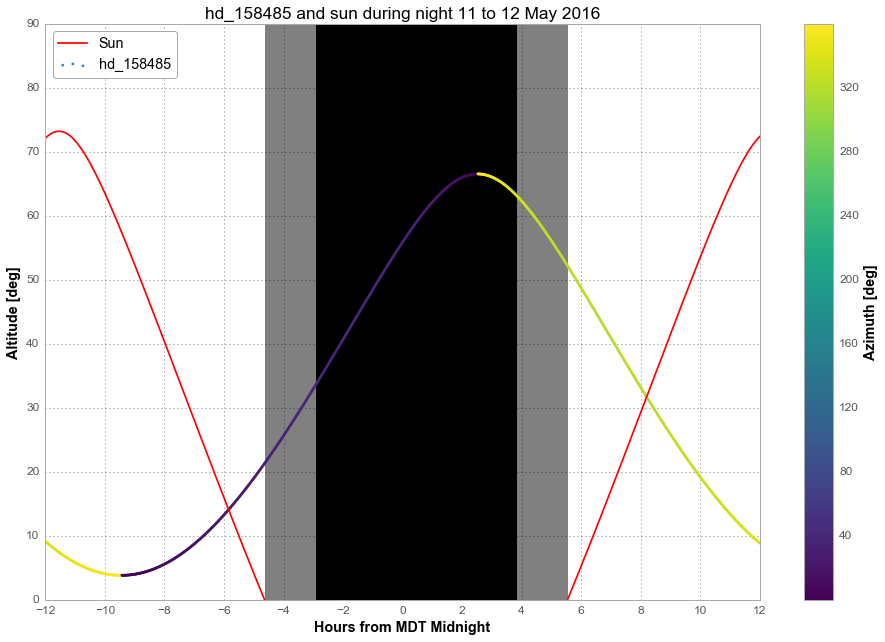

In [21]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May11_to_12.alt, color='r', label='Sun')
plt.scatter(delta_midnight, hd_158485_altazs_May11_to_12.alt,
            c=hd_158485_altazs_May11_to_12.az, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May11_to_12.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May11_to_12.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('hd_158485 and sun during night 11 to 12 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

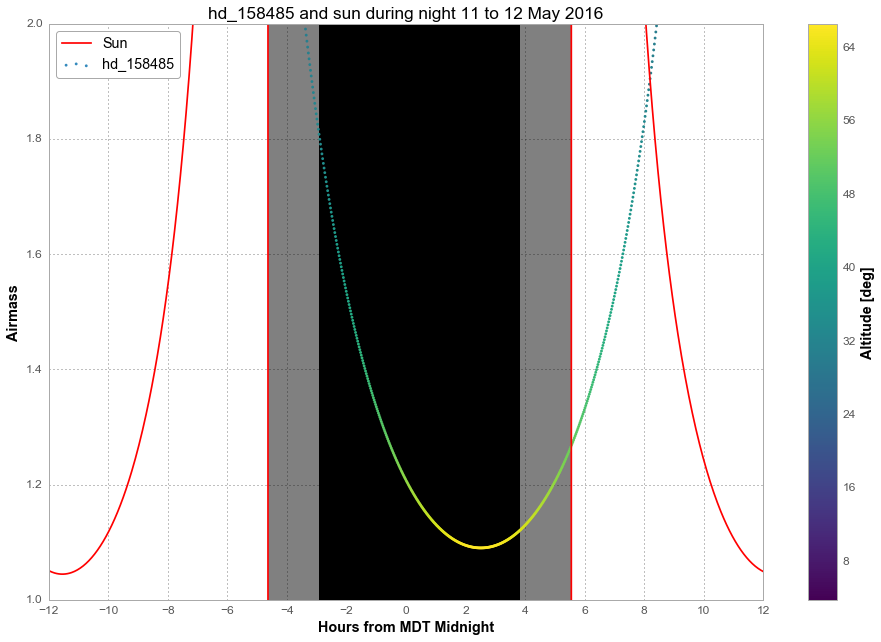

In [32]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May11_to_12.secz, color='r', label='Sun')
plt.scatter(delta_midnight, hd_158485_altazs_May11_to_12.secz,
            c=hd_158485_altazs_May11_to_12.alt, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May11_to_12.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_158485 and sun during night 11 to 12 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.show()

## Read the logbook table

In [84]:
tablefile_HD158485_PSF='HD158485_grat_1-132_TablePSF_night20160511.fits'
tablefile_HD158485_PSF_with_AM='HD158485_grat_1-132_TablePSF_night20160511_withAM.fits'

In [24]:
t = Table.read(tablefile_HD158485_PSF)

In [33]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.47415632464,4.32646900741,0.0,0.0,4.22360357046,4.08418674299
2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.23915877347,4.09248732084,0.392718231946,0.18464392513,4.00176588215,3.86330803087
3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.76020655028,3.81432116694,0.235852244067,0.767497075115,3.54963498347,3.60071918159
4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.56680321661,3.96483104307,0.181167115677,0.648766625551,3.36706223648,3.74280050466
5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.54780685321,3.54182907249,0.394432864272,0.769873402452,3.34912966943,3.34348664443
6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.5644327671,3.49984527018,0.199997271512,0.77663355496,3.36482453215,3.30385393505
7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.40986449559,3.42051094206,0.21440035444,0.74200994629,3.21891208384,3.2289623293
8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.31082909982,3.41278053444,0.287048747871,0.315149038754,3.12542267023,3.22166482451
9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.66129988733,3.56658136927,0.372296084714,0.601672154467,3.45626709364,3.36685281259
10,AssScImHD158485_grat_10.fits,2016-05-12T04:11:23.668,5.0,14,3.60612987419,3.49005403591,0.192594537903,0.801257717416,3.40418660124,3.2946110099


### retrieve the time and the number from the table

In [43]:
all_date_str=t['time']

In [46]:
all_num=t['num']

In [57]:
NB_NUMBERS=all_num.shape[0]

In [73]:
series_time=Time(all_date_str)

In [74]:
NB_EXPOSURES=series_time.shape[0]

### Do the required transformation to get the airmass

In [75]:
all_frame_May11_to_12 = AltAz(obstime=series_time, location=NOFS_location)

In [76]:
all_hd_158485_altazs_May11_to_12 = hd_158485_starloc.transform_to(all_frame_May11_to_12 )

In [77]:
all_hd_158485_altazs_May11_to_12_airmass=all_hd_158485_altazs_May11_to_12.secz

In [78]:
all_hd_158485_altazs_May11_to_12_airmass

<Quantity [ 1.78682177, 1.77678688, 1.7758358 , 1.77497081, 1.77408943,
            1.77322816, 1.77236495, 1.77149931, 1.77062714, 1.76976302,
            1.7689028 , 1.76803291, 1.76716694, 1.76630315, 1.76543869,
            1.76457746, 1.76371622, 1.76286162, 1.76200681, 1.76115624,
            1.7602978 , 1.43771521, 1.43716589, 1.43665314, 1.43614612,
            1.4356412 , 1.43513609, 1.4346304 , 1.4341286 , 1.43362298,
            1.43312135, 1.43086436, 1.43052234, 1.43024983, 1.42997526,
            1.42967385, 1.42940698, 1.42913269, 1.4288464 , 1.42858436,
            1.42828163, 1.42564474, 1.42537638, 1.42513586, 1.42489453,
            1.42465513, 1.42441356, 1.42417687, 1.42393237, 1.4236956 ,
            1.42345442, 1.22701119, 1.22654368, 1.22626772, 1.22599552,
            1.22572513, 1.22545136, 1.22517816, 1.224905  , 1.22463343,
            1.22436504, 1.22409515, 1.22377823, 1.22360987, 1.22346356,
            1.22330739, 1.22314401, 1.22295211, 1.22284885, 1.22

In [80]:
t['airmass']=all_hd_158485_altazs_May11_to_12_airmass

In [83]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,airmass
,,,,,,,,,,,
1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.47415632464,4.32646900741,0.0,0.0,4.22360357046,4.08418674299,1.78682177288
2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.23915877347,4.09248732084,0.392718231946,0.18464392513,4.00176588215,3.86330803087,1.77678688395
3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.76020655028,3.81432116694,0.235852244067,0.767497075115,3.54963498347,3.60071918159,1.77583579663
4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.56680321661,3.96483104307,0.181167115677,0.648766625551,3.36706223648,3.74280050466,1.77497080661
5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.54780685321,3.54182907249,0.394432864272,0.769873402452,3.34912966943,3.34348664443,1.77408943351
6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.5644327671,3.49984527018,0.199997271512,0.77663355496,3.36482453215,3.30385393505,1.77322816438
7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.40986449559,3.42051094206,0.21440035444,0.74200994629,3.21891208384,3.2289623293,1.7723649468
8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.31082909982,3.41278053444,0.287048747871,0.315149038754,3.12542267023,3.22166482451,1.77149930943
9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.66129988733,3.56658136927,0.372296084714,0.601672154467,3.45626709364,3.36685281259,1.77062714222


In [86]:
t.write(tablefile_HD158485_PSF_with_AM,format='fits')